# Sandbox - Utils

In [1]:
import os
import matplotlib.pyplot as plt
from calibration.image_processing import read_image, show_image, reflect_image, rotate_image, crop_square_roi

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True

Bits per channel: 16


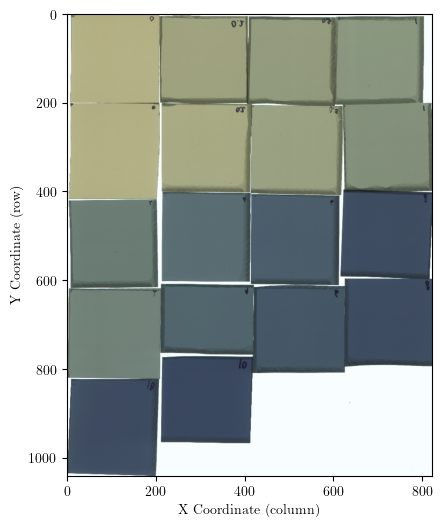

In [15]:
# ------------------------ EJEMPLO DE USO ------------------------

# 1) Especifica la ruta de tu imagen TIFF
ruta = os.path.join('media', 'Dosis0a10.tif')

# Leer la imagen TIFF
imagen = read_image(ruta)

# 2) Muestra la imagen original para determinar dónde quieres recortar.
_ = show_image(imagen)
#print(imagen.shape)

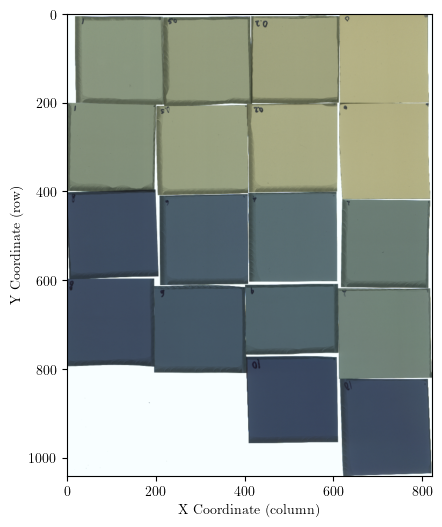

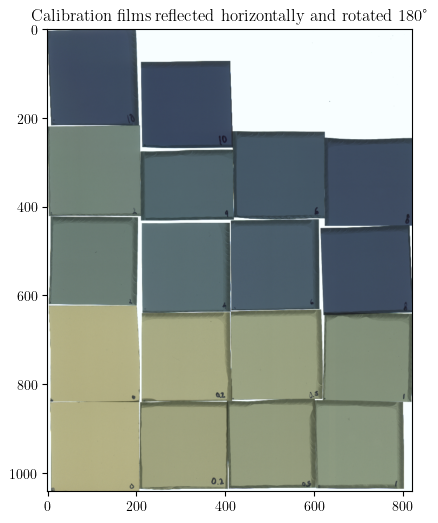

In [4]:
imagen_reflejada = reflect_image(imagen, mode='horizontal')
show_image(imagen_reflejada)

imagen_girada = rotate_image(imagen_reflejada, times=2, direction='clockwise')
_ = show_image(imagen_girada, title='Calibration films reflected horizontally and rotated 180°', show_labels=False)

In [5]:
# Diccionario con las coordenadas de las ROIs cuadradas
rois = {
    '0 Gy': (),
    '0.2 Gy': (),
    '0.5 Gy': (),
    '1 Gy': (),
    '2 Gy': (),
    '4 Gy': (),
    '6 Gy': (),
    '8 Gy': (),
    '10 Gy': (),
}

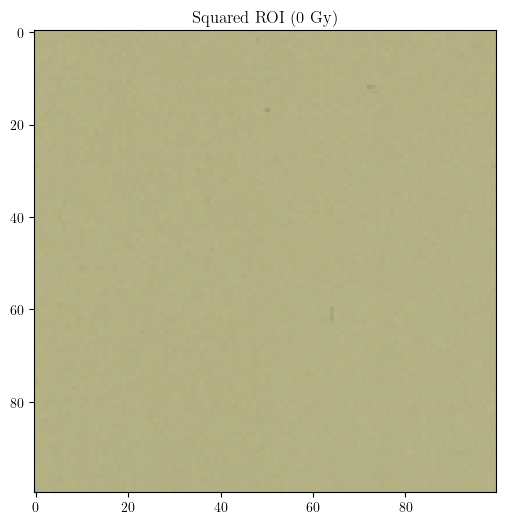

In [6]:
# Ahora, usando la imagen mostrada, elige manualmente:
#  - La esquina superior izquierda (x, y) donde comenzar el recorte
#  - El lado del cuadrado que desees

# 3) Define las coordenadas de la ROI (recuerda: x es columna, y es fila)
x_inicial = 50   # Ejemplo
y_inicial = 50  # Ejemplo
lado_roi  = 100  # ROI cuadrada de 200x200

# 4) Recorta la ROI
roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

# 5) Muestra la ROI recortada

_ = show_image(roi_cuadrada, title="Squared ROI (0 Gy)", show_labels=False, show_axis=False)


## Continuación

In [7]:
orden_dosis = [0]*2 + [2]*2 + [0.2]*2 + [4]*2 + [0.5]*2 + [6]*2 + [1]*2 + [8]*2 + [10]*2
print(orden_dosis)

[0, 0, 2, 2, 0.2, 0.2, 4, 4, 0.5, 0.5, 6, 6, 1, 1, 8, 8, 10, 10]


# Modulo FilmCalibration

In [8]:
from calibration.calibration import FilmCalibration

Bits per channel: 16


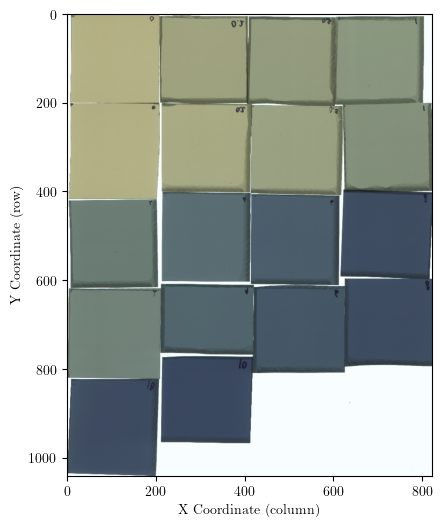

In [9]:
ruta = os.path.join('.','media', 'Dosis0a10.tif')
imagen_groundtruth = read_image(ruta)
show_image(imagen_groundtruth)

calibracion = FilmCalibration(imagen_groundtruth, fitting_function_name='polynomial')

In [10]:
print(calibracion)

FilmCalibration(NumDoses=0, NumROIs=0, Type=single-channel)


In [11]:
def obtener_rois(show=False):
    
    lado_roi = 100    
    index = 0

    for i in range(0+50,800,200):
        for j in range(0+50,800,200):
            print(i,j)

            dosis = orden_dosis[index]
            print(dosis)
            #coordenadas_rois[dosis] = (i,j)

            calibracion.add_roi(dosis, x=i, y=j, size=lado_roi)

            roi_cuadrada = crop_square_roi(imagen, i, j, lado_roi)
            
            #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

            index += 1	

    x_inicial = 50   # Ejemplo
    y_inicial = 850  # Ejemplo
    lado_roi  = 100  # ROI cuadrada de 200x200

    # 4) Recorta la ROI
    roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

    #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

    calibracion.add_roi(10, x=x_inicial, y=y_inicial, size=lado_roi)

    ###################################

    x_inicial = 250   # Ejemplo
    y_inicial = 800  # Ejemplo
    lado_roi  = 100  # ROI cuadrada de 200x200

    # 4) Recorta la ROI
    roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

    #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

    calibracion.add_roi(10, x=x_inicial, y=y_inicial, size=lado_roi)

In [12]:
obtener_rois()

50 50
0
50 250
0
50 450
2
50 650
2
250 50
0.2
250 250
0.2
250 450
4
250 650
4
450 50
0.5
450 250
0.5
450 450
6
450 650
6
650 50
1
650 250
1
650 450
8
650 650
8


In [16]:
calibracion.get_rois_by_dose()

Dosis: 0 Gy
ROIs: [(50, 50, 100), (50, 250, 100)] 

Dosis: 2 Gy
ROIs: [(50, 450, 100), (50, 650, 100)] 

Dosis: 0.2 Gy
ROIs: [(250, 50, 100), (250, 250, 100)] 

Dosis: 4 Gy
ROIs: [(250, 450, 100), (250, 650, 100)] 

Dosis: 0.5 Gy
ROIs: [(450, 50, 100), (450, 250, 100)] 

Dosis: 6 Gy
ROIs: [(450, 450, 100), (450, 650, 100)] 

Dosis: 1 Gy
ROIs: [(650, 50, 100), (650, 250, 100)] 

Dosis: 8 Gy
ROIs: [(650, 450, 100), (650, 650, 100)] 

Dosis: 10 Gy
ROIs: [(50, 850, 100), (250, 800, 100)] 



LUT: para cada dosis, su el valor de pixel (desacoplarlo: puede ser el pixel value sin más, o el netOD, o el netT) para cada canal 

In [14]:
aaa

NameError: name 'aaa' is not defined

In [ ]:
calibracion.calibrate()

c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\calibration\functions.py:56: RuntimeWarning: divide by zero encountered in power
  return a * x + b * (x ** n)


[array([ 8.07106019, 98.66201454,  3.86617642]),
 array([11.29033674, 58.26141573,  2.51114706]),
 array([ 22.71779409, 164.42754432,   1.67335721])]

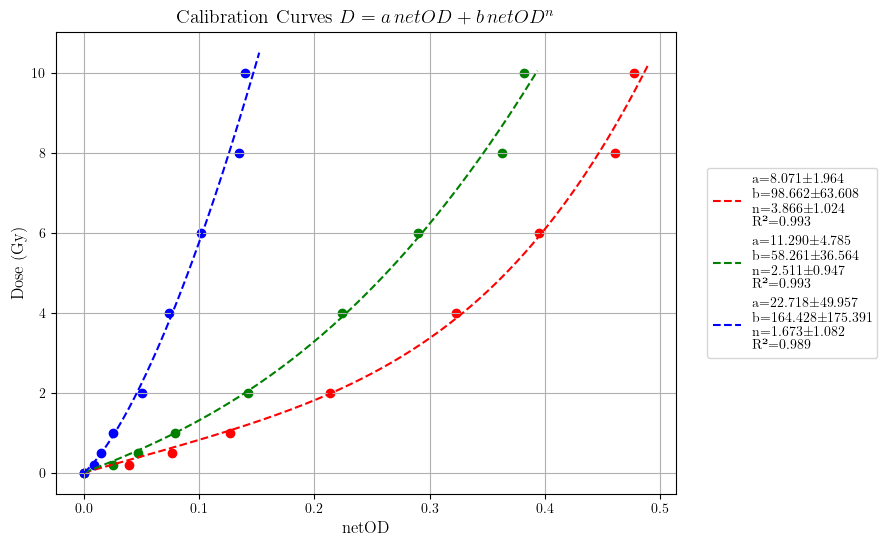

In [ ]:
calibracion.graph_calibration_curve()

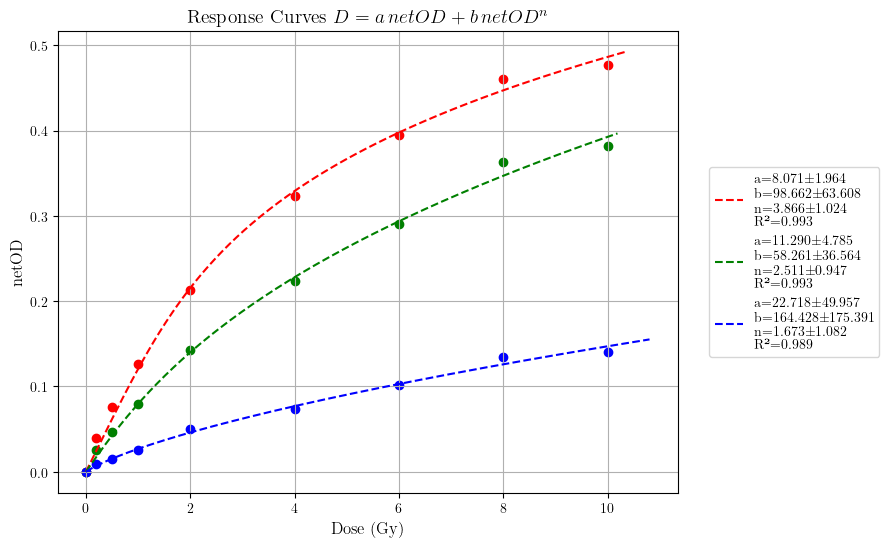

In [ ]:
calibracion.graph_response_curve()

In [ ]:
print(calibracion)

FilmCalibration(NumDoses=9, NumROIs=18, Type=single-channel)


In [ ]:
for key, value in calibracion.__dict__.items():
    print(f"{key}: {value}")

groundtruth_image: [[[0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  ...
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]]

 [[0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  ...
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]]

 [[0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  ...
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]]

 ...

 [[0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  ...
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]
  [0.97422751 0.99786374 1.        ]]

 [[0.97422751 0.99786374 1.        ]
  [0.97422751 0.99

In [ ]:
calibracion.to_json("calibracion_test.json")

# Manual verification

In [ ]:
netOD_sample = 0.5

a, b, n = 8.05, 96.67, 3.87
dosis_sample = (a*netOD_sample) + (b * (netOD_sample**n)) 
dosis_sample

10.63658575630473

In [ ]:
netOD_sample = 0.4

a, b, n = -113.98, 114.11, 0.997
dosis_sample = (a*netOD_sample) + (b * (netOD_sample**n)) 
dosis_sample

0.1776421304607254